<a href="https://colab.research.google.com/github/VitorMPCastro/pythonIPYNB/blob/main/triangleTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Side lengths: AB = 1.00, BC = 1.00, CA = 1.00
Perimeter: 3.00
Area: 0.43
Angles: A = 60.00°, B = 60.00°, C = 60.00°
Classification: Scalene


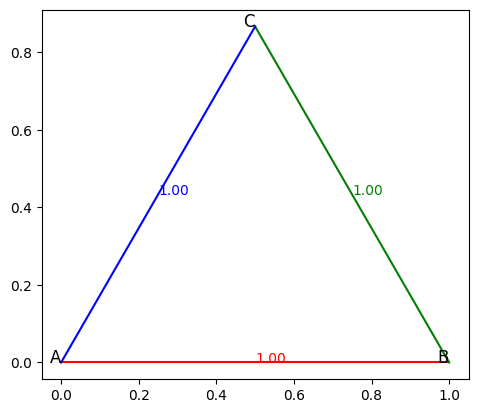

In [50]:
def main():
    try:
        A = (0, 0)
        B = (1.00001, 0)
        C = (0.5, math.sqrt(0.75))

        triangle = Triangle(A, B, C)

        print(f"Side lengths: AB = {triangle.side_AB:.2f}, BC = {triangle.side_BC:.2f}, CA = {triangle.side_CA:.2f}")
        print(f"Perimeter: {triangle.perimeter():.2f}")
        print(f"Area: {triangle.area():.2f}")
        angles = triangle.angles()
        print(f"Angles: A = {angles[0]:.2f}°, B = {angles[1]:.2f}°, C = {angles[2]:.2f}°")
        print(f"Classification: {triangle.classify()}")

        triangle.draw_triangle()

    except InvalidTriangleError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

main()


In [42]:
import math
import matplotlib.pyplot as plt

class InvalidTriangleError(Exception):
    """Custom exception for invalid triangles."""
    pass

class Triangle:
    def __init__(self, A, B, C):
        self.A = A
        self.B = B
        self.C = C

        self.side_AB = self.distance(self.A, self.B)
        self.side_BC = self.distance(self.B, self.C)
        self.side_CA = self.distance(self.C, self.A)

        if not self.is_valid_triangle():
          raise InvalidTriangleError("The given points do not form a valid triangle.")

    def distance(self, P, Q):
        return math.sqrt((Q[0] - P[0]) **2 + (Q[1] - P[1]) **2)

    def is_valid_triangle(self):
        """Check the triangle inequality theorem."""
        return (self.side_AB + self.side_BC > self.side_CA and
                self.side_AB + self.side_CA > self.side_BC and
                self.side_BC + self.side_CA > self.side_AB)

    def perimeter(self):
        return self.side_AB + self.side_BC + self.side_CA

    def area(self):
        s = self.perimeter() / 2
        return math.sqrt(s * (s - self.side_AB) * (s - self.side_BC) * (s - self.side_CA))

    def classify(self):
        sides = [self.side_AB, self.side_BC, self.side_CA]
        tolerance = 1e-12

        if abs(self.side_AB - self.side_BC) < tolerance and \
          abs(self.side_BC - self.side_CA) < tolerance:
            return "Equilateral"
        elif abs(self.side_AB - self.side_BC) < tolerance or \
            abs(self.side_BC - self.side_CA) < tolerance or \
            abs(self.side_CA - self.side_AB) < tolerance:
            return "Isosceles"
        else:
            return "Scalene"


    def angle(self, side1, side2, opposite_side):
        cos_theta = (side1**2 + side2**2 - opposite_side**2) / (2 * side1 * side2)
        return math.degrees(math.acos(cos_theta))

    def angles(self):
        angle_A = self.angle(self.side_AB, self.side_CA, self.side_BC)
        angle_B = self.angle(self.side_AB, self.side_BC, self.side_CA)
        angle_C = self.angle(self.side_BC, self.side_CA, self.side_AB)
        return angle_A, angle_B, angle_C

    def draw_triangle(self):
        plt.figure()

        plt.plot([self.A[0], self.B[0]], [self.A[1], self.B[1]], 'r-')
        plt.plot([self.B[0], self.C[0]], [self.B[1], self.C[1]], 'g-')
        plt.plot([self.C[0], self.A[0]], [self.C[1], self.A[1]], 'b-')

        plt.text(self.A[0], self.A[1], 'A', fontsize=12, ha='right')
        plt.text(self.B[0], self.B[1], 'B', fontsize=12, ha='right')
        plt.text(self.C[0], self.C[1], 'C', fontsize=12, ha='right')

        plt.text((self.A[0] + self.B[0]) / 2, (self.A[1] + self.B[1]) / 2,
                 f'{self.side_AB:.2f}', color='red')
        plt.text((self.B[0] + self.C[0]) / 2, (self.B[1] + self.C[1]) / 2,
                 f'{self.side_BC:.2f}', color='green')
        plt.text((self.C[0] + self.A[0]) / 2, (self.C[1] + self.A[1]) / 2,
                 f'{self.side_CA:.2f}', color='blue')

        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()


In [51]:
import unittest
import math

class TestTriangle(unittest.TestCase):

    def test_valid_triangle(self):
        """Test if a valid triangle is created."""
        A = (0, 0)
        B = (4, 0)
        C = (0, 3)
        triangle = Triangle(A, B, C)
        self.assertEqual(triangle.side_AB, 4.0)
        self.assertEqual(triangle.side_BC, 5.0)
        self.assertEqual(triangle.side_CA, 3.0)

    def test_invalid_triangle(self):
        """Test if an invalid triangle raises an exception."""
        A = (0, 0)
        B = (4, 0)
        C = (8, 0)  # Collinear points
        with self.assertRaises(InvalidTriangleError):
            Triangle(A, B, C)

    def test_perimeter(self):
        """Test the perimeter calculation."""
        A = (0, 0)
        B = (4, 0)
        C = (0, 3)
        triangle = Triangle(A, B, C)
        self.assertAlmostEqual(triangle.perimeter(), 12.0)

    def test_area(self):
        """Test the area calculation."""
        A = (0, 0)
        B = (4, 0)
        C = (0, 3)
        triangle = Triangle(A, B, C)
        self.assertAlmostEqual(triangle.area(), 6.0)

    def test_classification_equilateral(self):
        """Test classification of an equilateral triangle."""
        A = (0, 0)
        B = (2, 0)
        C = (1, math.sqrt(3))
        triangle = Triangle(A, B, C)
        self.assertEqual(triangle.classify(), "Equilateral")

    def test_classification_isosceles(self):
        """Test classification of an isosceles triangle."""
        A = (0, 0)
        B = (4, 0)
        C = (2, 3)
        triangle = Triangle(A, B, C)
        self.assertEqual(triangle.classify(), "Isosceles")

    def test_classification_scalene(self):
        """Test classification of a scalene triangle."""
        A = (0, 0)
        B = (4, 0)
        C = (0, 3)
        triangle = Triangle(A, B, C)
        self.assertEqual(triangle.classify(), "Scalene")

    def test_angle_calculation(self):
        """Test if angle calculations are correct."""
        A = (0, 0)
        B = (4, 0)
        C = (0, 3)
        triangle = Triangle(A, B, C)
        angles = triangle.angles()
        self.assertAlmostEqual(angles[0], 90.0, delta=1.0)  # Angle at A
        self.assertAlmostEqual(angles[1], 36.87, delta=0.1)  # Angle at B
        self.assertAlmostEqual(angles[2], 53.13, delta=0.1)  # Angle at C

    def test_degenerate_triangle(self):
        """Test if a degenerate triangle (collinear points) raises an exception."""
        A = (0, 0)
        B = (4, 0)
        C = (8, 0)  # Collinear points
        with self.assertRaises(InvalidTriangleError):
            Triangle(A, B, C)

    def test_almost_equilateral(self):
        """Test an almost equilateral triangle with a small precision error."""
        A = (0, 0)
        B = (1.00001, 0)
        C = (0.5, math.sqrt(0.75))  # Close to equilateral
        triangle = Triangle(A, B, C)
        self.assertEqual(triangle.classify(), "Scalene")


# Run the tests
unittest.main(argv=[''], exit=False)


..........
----------------------------------------------------------------------
Ran 10 tests in 0.016s

OK
